In [1015]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [1016]:
import warnings
warnings.filterwarnings("ignore")

In [1017]:
df=pd.read_csv("Sample_Longlist_Data.csv")

In [1018]:
df.head(3)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,15-Nov-20,Garden,Seller 1,#NAME?,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,15-Nov-20,Garden,Seller 2,#NAME?,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,15-Nov-20,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [1019]:
df1=df.drop_duplicates()

In [1020]:
df1.describe()

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings
count,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000
mean,6.951060,5.808592,7.632409,12.312670,1399.745514,765.173464
std,6.232073,18.117027,19.902394,23.435871,6204.123987,3817.355945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,15.000000,0.000000,4.000000,14.000000,176.500000,87.500000
max,16.000000,100.000000,100.000000,100.000000,86856.000000,70732.000000


In [1021]:
df1.columns


Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL'],
      dtype='object')

In [1022]:
for i in ["Date Added","category",'sellerlink',"sellerstorefront-url",'sellerlink-url']:
    print(df[i].unique(),"\n",len(df[i].unique()),"\n")

['15-Nov-20'] 
 1 

['Garden'] 
 1 

['Seller 1' 'Seller 2' 'Seller 3' ... 'Seller 1837' 'Seller 1838'
 'Seller 1839'] 
 1839 

['Seller 1-storefrontlink' 'Seller 2-storefrontlink'
 'Seller 3-storefrontlink' ... 'Seller 1837-storefrontlink'
 'Seller 1838-storefrontlink' 'Seller 1839-storefrontlink'] 
 1839 

['#NAME?' 'Seller 3-link' 'Seller 4-link' ... 'Seller 1837-link'
 'Seller 1838-link' 'Seller 1839-link'] 
 1837 



In [1023]:
#Dropping columns Date Added,category,sellerstorefront-url 
df2=df1.drop(["Date Added","category","sellerstorefront-url",'sellerlink-url'],axis='columns')


In [1024]:
df2.isna().sum()

sellerlink                                             0
sellerproductcount                                   326
sellerratings                                        428
sellerdetails                                         27
seller business name                                  56
businessaddress                                       75
Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Hero Product 1 #ratings                                0
Hero Product 2 #ratings                                0
Sample brand name                                      4
Sample Brand URL                                       0
dtype: int64

In [1025]:
df2.head()

,sellerlink,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,Seller 1,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,Seller 2,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,Seller 3,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,Seller 4,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,?????????????????????????????1901?450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,Seller 5,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [1026]:
#We remove the Seller from the seller link column
def seller_lnk(x):
        try:
            a=re.sub('Seller','',x)
            return a
        except:
            return x   
        
df2["sellerlink"]=[seller_lnk(i) for i in df2.sellerlink]        

In [1027]:
df2.head(2)

,sellerlink,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,1,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...


In [1028]:
#Sly we extract the seller product count values from the column seller product count
def extract_spcount(x):
    try:
        pattern="[0-9\,\ ]{2,8}"
        b=re.findall(pattern,x)
        return int(re.sub(',','',b[-1]))
    except:
        return x
df2['sellerproductcount']=[extract_spcount(i) for i in df2.sellerproductcount]    

In [1029]:
df2['sellerproductcount'].describe()

count      1513.000000
mean       6150.933245
std       13519.529562
min           3.000000
25%         701.000000
50%        2000.000000
75%        6000.000000
max      200000.000000
Name: sellerproductcount, dtype: float64

In [1030]:
print(df2['sellerproductcount'].isna().sum())

326


In [1031]:
df2.head(2)

,sellerlink,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,1,100000.0,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...


In [1032]:
#Now we extract seller ratings percentage values and count of ratings and store these in different columns
def sellerratings_p(x):
    try:
        return int(re.findall('[\d]{1,3}',x)[0])
    except:
        return x
def sellerratings_r(x):
    try:
        t=re.findall('[\d]{1,5}',x)
        if t[1]=='12'and len(t)>2:
            return int(t[2])
        else:
            return int(t[1])
    except:
        return x

In [1033]:
df2["percentage_positive_sellerratings"]=[sellerratings_p(x) for x in df2.sellerratings]
df2["count_positive_sellerratings"]=[sellerratings_r(x) for x in df2.sellerratings]

In [1034]:
#Extracting the location of the business
def S_Address(x):
    try:
        return re.findall('[U|D|C][S|E|CN]',x)[-1]
    except:
        return 'NaN'
df2["businessaddress"]=[S_Address(x) for x in df2.businessaddress ]    

In [1035]:
df2.head(2)

,sellerlink,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,percentage_positive_sellerratings,count_positive_sellerratings
0,1,100000.0,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,US,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88.0,118.0
1,2,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,DE,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,90.0,566.0


In [1036]:
print(len(df2["seller business name"].unique()))
print(len(df2["Sample brand name"].unique()))

1784
1640


In [1037]:
#Clearly Some of the columns are not relevant to us hence we drop them here
df3=df2.drop(['sellerratings','seller business name','Sample brand name','Sample Brand URL'],axis="columns")

In [1038]:
df3.head(3)

,sellerlink,sellerproductcount,sellerdetails,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,percentage_positive_sellerratings,count_positive_sellerratings
0,1,100000.0,Lohas Living Inc James Mazzello US 845 3RD Ave...,US,16,17,11,12,5873,4957,88.0,118.0
1,2,NaN,Herzlich Willkommen im Amazon Shop von 1a-Hand...,DE,0,2,2,9,0,0,90.0,566.0
2,3,2000.0,67878u6i7 is committed to providing each custo...,CN,15,0,25,12,164,162,85.0,75.0


In [1039]:
#As we need to conduct our analysis only on Germany(DE) and US
df4=df3[(df3.businessaddress=='US')|(df3.businessaddress=='DE')]

In [1040]:
df4.isna().sum()

sellerlink                                            0
sellerproductcount                                   64
sellerdetails                                         2
businessaddress                                       0
Count of seller brands                                0
Max % of negative seller ratings - last 30 days       0
Max % of negative seller ratings - last 90 days       0
Max % of negative seller ratings - last 12 months     0
Hero Product 1 #ratings                               0
Hero Product 2 #ratings                               0
percentage_positive_sellerratings                     2
count_positive_sellerratings                          2
dtype: int64

In [1041]:
#We can safely drop Rows with null values
df5=df4.dropna()

In [1042]:
df5.isna().sum()

sellerlink                                           0
sellerproductcount                                   0
sellerdetails                                        0
businessaddress                                      0
Count of seller brands                               0
Max % of negative seller ratings - last 30 days      0
Max % of negative seller ratings - last 90 days      0
Max % of negative seller ratings - last 12 months    0
Hero Product 1 #ratings                              0
Hero Product 2 #ratings                              0
percentage_positive_sellerratings                    0
count_positive_sellerratings                         0
dtype: int64

In [1043]:
df5.head(3)

,sellerlink,sellerproductcount,sellerdetails,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,percentage_positive_sellerratings,count_positive_sellerratings
0,1,100000.0,Lohas Living Inc James Mazzello US 845 3RD Ave...,US,16,17,11,12,5873,4957,88.0,118.0
14,15,919.0,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,DE,15,0,0,3,1446,921,97.0,116.0
22,23,40000.0,Bestof Floral is committed to providing each c...,US,16,0,0,0,10538,8293,100.0,10.0


In [1044]:
#We make a new feature replacing Max % of negative seller ratings - last 30 days,90 days and 12 months 
#We would penalise the seller more for the long term negative reviews more than the short term and then average it out
#Hence the formula that we would use would be = avg(2*(Ratings of 30 days)+4*(Ratings of 90 days)+8(2*(Ratings of 12 months)))

In [1045]:
df5["Average Max Negative Rating"]=(df5['Max % of negative seller ratings - last 30 days'] *2+df5["Max % of negative seller ratings - last 90 days"] *4+df5["Max % of negative seller ratings - last 12 months"]*8)/3

In [1046]:
df5

,sellerlink,sellerproductcount,sellerdetails,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,percentage_positive_sellerratings,count_positive_sellerratings,Average Max Negative Rating
0,1,100000.0,Lohas Living Inc James Mazzello US 845 3RD Ave...,US,16,17,11,12,5873,4957,88.0,118.0,58.000000
14,15,919.0,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,DE,15,0,0,3,1446,921,97.0,116.0,8.000000
22,23,40000.0,Bestof Floral is committed to providing each c...,US,16,0,0,0,10538,8293,100.0,10.0,0.000000
23,24,100000.0,Blumenbecker Industriebedarf GmbH Sudhoferweg ...,DE,15,15,12,10,30139,11182,88.0,3134.0,52.666667
24,25,3000.0,Herzlich willkommen auf unserer Internetpr�sen...,DE,15,3,1,2,3286,3079,97.0,610.0,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,1780,211.0,Impressum\n�\n�Gesetzliche Anbieterkennung:\n�...,DE,10,0,0,3,158,49,94.0,34.0,8.000000
1780,1781,1000.0,Matthias L�chelt\n Ruhrstra�e 13\n 59955 Winte...,DE,14,2,2,2,601,321,97.0,631.0,9.333333
1781,1782,400.0,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,DE,14,0,0,7,3682,1450,91.0,196.0,18.666667
1808,1809,52.0,Z�ndholz Riesa is committed to providing each ...,DE,8,0,0,0,65,41,100.0,16.0,0.000000


In [1047]:
#Also We need sellers with popular products hence we will take average of number of ratings of 1st and 2nd popular product
#We will give more relative weight to Number 2 product as we want sellers with more number of products popular
#Hence we use the formula: ([Hero Product 1 #ratings]+[Hero Product 2 #ratings]*2)/2

df5["Avg Hero product ratings"]=(df5["Hero Product 1 #ratings"]+df5["Hero Product 2 #ratings"] *2)/2

In [1048]:
df5.head(3)

,sellerlink,sellerproductcount,sellerdetails,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,percentage_positive_sellerratings,count_positive_sellerratings,Average Max Negative Rating,Avg Hero product ratings
0,1,100000.0,Lohas Living Inc James Mazzello US 845 3RD Ave...,US,16,17,11,12,5873,4957,88.0,118.0,58.0,7893.5
14,15,919.0,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,DE,15,0,0,3,1446,921,97.0,116.0,8.0,1644.0
22,23,40000.0,Bestof Floral is committed to providing each c...,US,16,0,0,0,10538,8293,100.0,10.0,0.0,13562.0


In [1049]:
#Selecting only relevant columns for further exploration
#We drop count of positive ratings columns as percentage_positive_sellerratings column gives us the same idea
df6=df5[["sellerlink","sellerproductcount","Count of seller brands","percentage_positive_sellerratings","Average Max Negative Rating","Avg Hero product ratings","businessaddress",'sellerdetails']]

In [1050]:
df6

,sellerlink,sellerproductcount,Count of seller brands,percentage_positive_sellerratings,Average Max Negative Rating,Avg Hero product ratings,businessaddress,sellerdetails
0,1,100000.0,16,88.0,58.000000,7893.5,US,Lohas Living Inc James Mazzello US 845 3RD Ave...
14,15,919.0,15,97.0,8.000000,1644.0,DE,Impressum\n \n Gesetzliche Anbieterkennung:\n ...
22,23,40000.0,16,100.0,0.000000,13562.0,US,Bestof Floral is committed to providing each c...
23,24,100000.0,15,88.0,52.666667,26251.5,DE,Blumenbecker Industriebedarf GmbH Sudhoferweg ...
24,25,3000.0,15,97.0,8.666667,4722.0,DE,Herzlich willkommen auf unserer Internetpr�sen...
...,...,...,...,...,...,...,...,...
1779,1780,211.0,10,94.0,8.000000,128.0,DE,Impressum\n�\n�Gesetzliche Anbieterkennung:\n�...
1780,1781,1000.0,14,97.0,9.333333,621.5,DE,Matthias L�chelt\n Ruhrstra�e 13\n 59955 Winte...
1781,1782,400.0,14,91.0,18.666667,3291.0,DE,Impressum\n \n Gesetzliche Anbieterkennung:\n ...
1808,1809,52.0,8,100.0,0.000000,73.5,DE,Z�ndholz Riesa is committed to providing each ...


In [1051]:
#Extracting Phone numbers and Emails from seller details column
def extract_phone_no(x):
    try:
        a=re.findall('[\.\:0-9\,\/,\-\ ]{10,13}',x)[0]
        return a
    except:
        return 'Na'
def extract_phone_no(x):
    try:
        A=re.findall('[a-zA-Z0-9_\-\.]+[@][a-z0-9\-]+[\.][a-z]{2,3}',x)[0]
        return A
    except:
        return 'Na'

In [1052]:
df6["Email"]=[extract_phone_no(x) for x in df6.sellerdetails]
df6["Phone_number"]=[extract_phone_no(x) for x in df6.sellerdetails]

In [1053]:
df6=df6.drop(["sellerdetails"],axis='columns')

In [1054]:
#Location wise Exploration
US_df=df6[df6.businessaddress=='US']
DE_df=df6[df6.businessaddress=='DE']

Text(0, 0.5, 'Average Max Negative Rating')

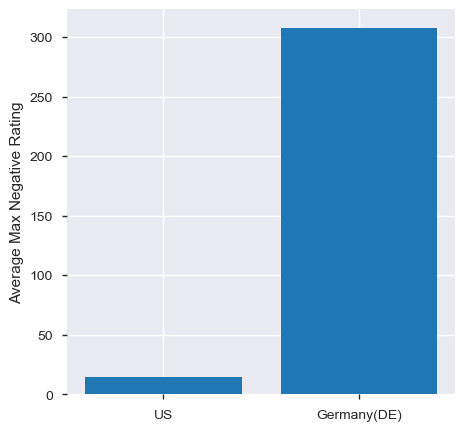

In [1055]:
#Comparasion of number of sellers Location wise
plt.figure(figsize=(5,5))
plt.bar(("US","Germany(DE)"),(US_df['Average Max Negative Rating'].shape[0],DE_df['Average Max Negative Rating'].shape[0]))
plt.ylabel("Average Max Negative Rating")

In [1056]:
#Conclusion1: Germany has significantly higher number of sellers in comparision of US

Text(0, 0.5, 'Average Max Negative Rating')

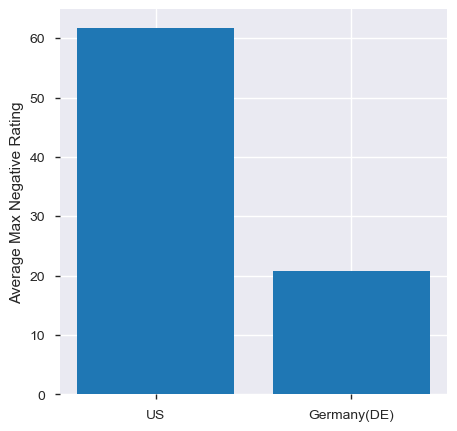

In [1057]:
#COMPARISION OF AVERAGE NEGATIVE RATINGS
plt.figure(figsize=(5,5))
plt.bar(("US","Germany(DE)"),(US_df['Average Max Negative Rating'].mean(),DE_df['Average Max Negative Rating'].mean()))
plt.ylabel("Average Max Negative Rating")

Text(0, 0.5, 'sellerproductcount')

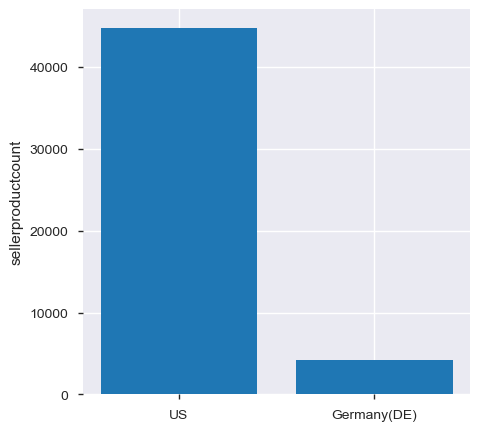

In [1058]:
#Comparision of Average Seller productcount
plt.figure(figsize=(5,5))
plt.bar(("US","Germany(DE)"),(US_df['sellerproductcount'].mean(),DE_df['sellerproductcount'].mean()))
plt.ylabel("sellerproductcount")

In [1059]:
#Conclusion2: Despite having lesser number of sellers Average max negatice rating is higher in case of US

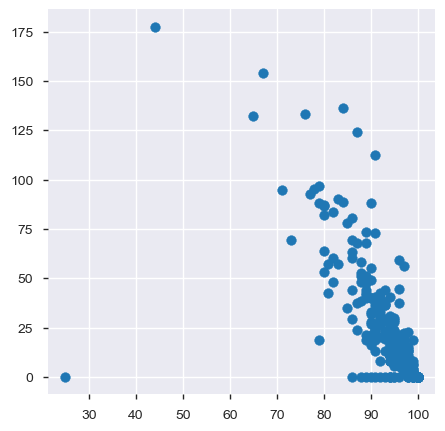

In [1060]:
#It appears from the plot that two features may have negative corelation 
plt.figure(figsize=(5,5))
plt.scatter(df6.percentage_positive_sellerratings,df6['Average Max Negative Rating'])

In [1061]:
#We explore the Pearson correlation coef in order to reach to a conclusion 
df6.corr()

,sellerproductcount,Count of seller brands,percentage_positive_sellerratings,Average Max Negative Rating,Avg Hero product ratings
sellerproductcount,1.000000,0.158896,-0.145578,0.172803,0.387094
Count of seller brands,0.158896,1.000000,-0.049252,0.099450,0.236880
percentage_positive_sellerratings,-0.145578,-0.049252,1.000000,-0.708371,-0.086278
Average Max Negative Rating,0.172803,0.099450,-0.708371,1.000000,0.106392
Avg Hero product ratings,0.387094,0.236880,-0.086278,0.106392,1.000000


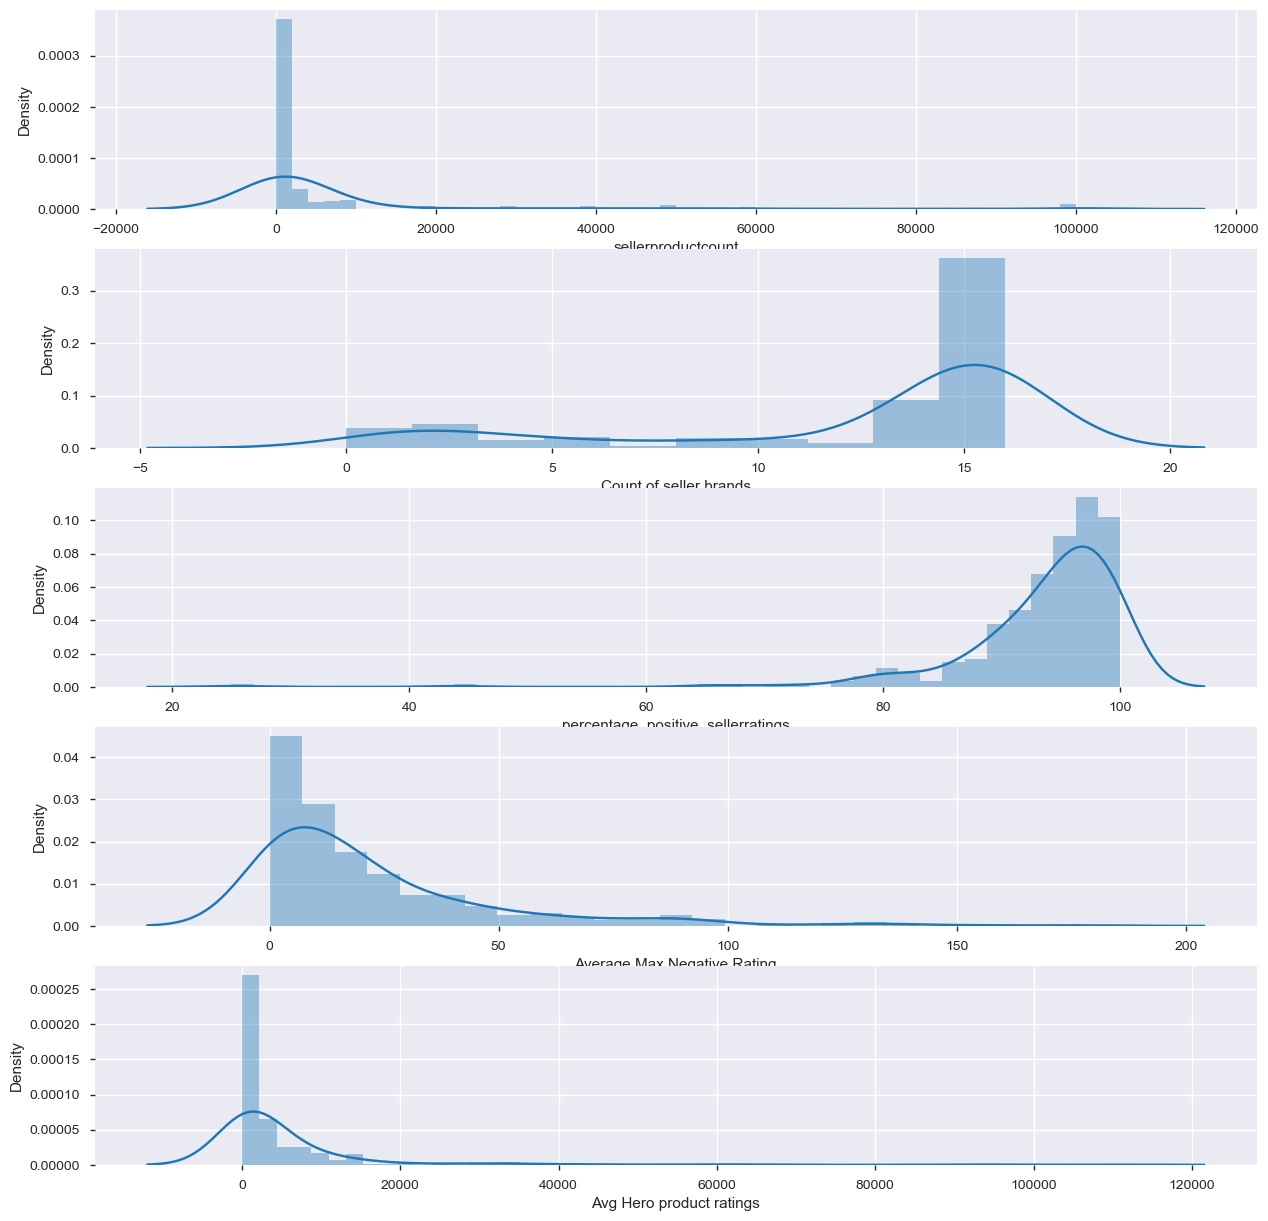

In [1062]:
#Plotting density plots of the features present with us
plt.figure(figsize=(15,15))
cols_to_plt=["sellerproductcount","Count of seller brands","percentage_positive_sellerratings","Average Max Negative Rating","Avg Hero product ratings"]
for i in enumerate(cols_to_plt):
    plt.subplot(5,1,i[0]+1)
    
    sns.distplot(df5[i[1]])
    

In [1063]:
#We see that almost all the data has outliers

In [1064]:
df6.describe()

,sellerproductcount,Count of seller brands,percentage_positive_sellerratings,Average Max Negative Rating,Avg Hero product ratings
count,323.000000,323.000000,323.000000,323.000000,323.000000
mean,6051.866873,12.281734,93.588235,22.621259,5456.588235
std,17015.139934,5.112207,7.518143,28.237984,12642.076550
min,5.000000,0.000000,25.000000,0.000000,0.000000
25%,232.000000,10.000000,91.500000,4.000000,254.250000
50%,836.000000,15.000000,96.000000,13.333333,1240.500000
75%,3000.000000,16.000000,98.000000,29.333333,4793.000000
max,100000.000000,16.000000,100.000000,177.333333,109589.000000


In [1065]:
#We clean the outliers(Assumed to be in top or bottom 10 percentile of the distribution) by replacing them with 90th percentile value or 10th percentile value respectively
def clean_outlier(dff,feat,x,skewness):
    top=np.percentile(list(dff[feat]),90)
    btm=np.percentile(list(dff[feat]),10)
    if skewness=='L':
        if x<btm:
            return btm
        else:
            return x
    if skewness=='R':
        if x>top:
            return top
        else:
            return x

In [1066]:
#If the data is right skewed we replace all values in top 10 percentile with 90th percentile value and 
#if the data is left skewed we replace all values in bottom 10percentile with 10th percentile vale 
for ftr in ['sellerproductcount','Average Max Negative Rating','Avg Hero product ratings']:
    df6[ftr]=[clean_outlier(df6,ftr,x,'R') for x in df6[ftr]]
for ftr in ['Count of seller brands','percentage_positive_sellerratings']:
    df6[ftr]=[clean_outlier(df6,ftr,x,'L') for x in df6[ftr]]   

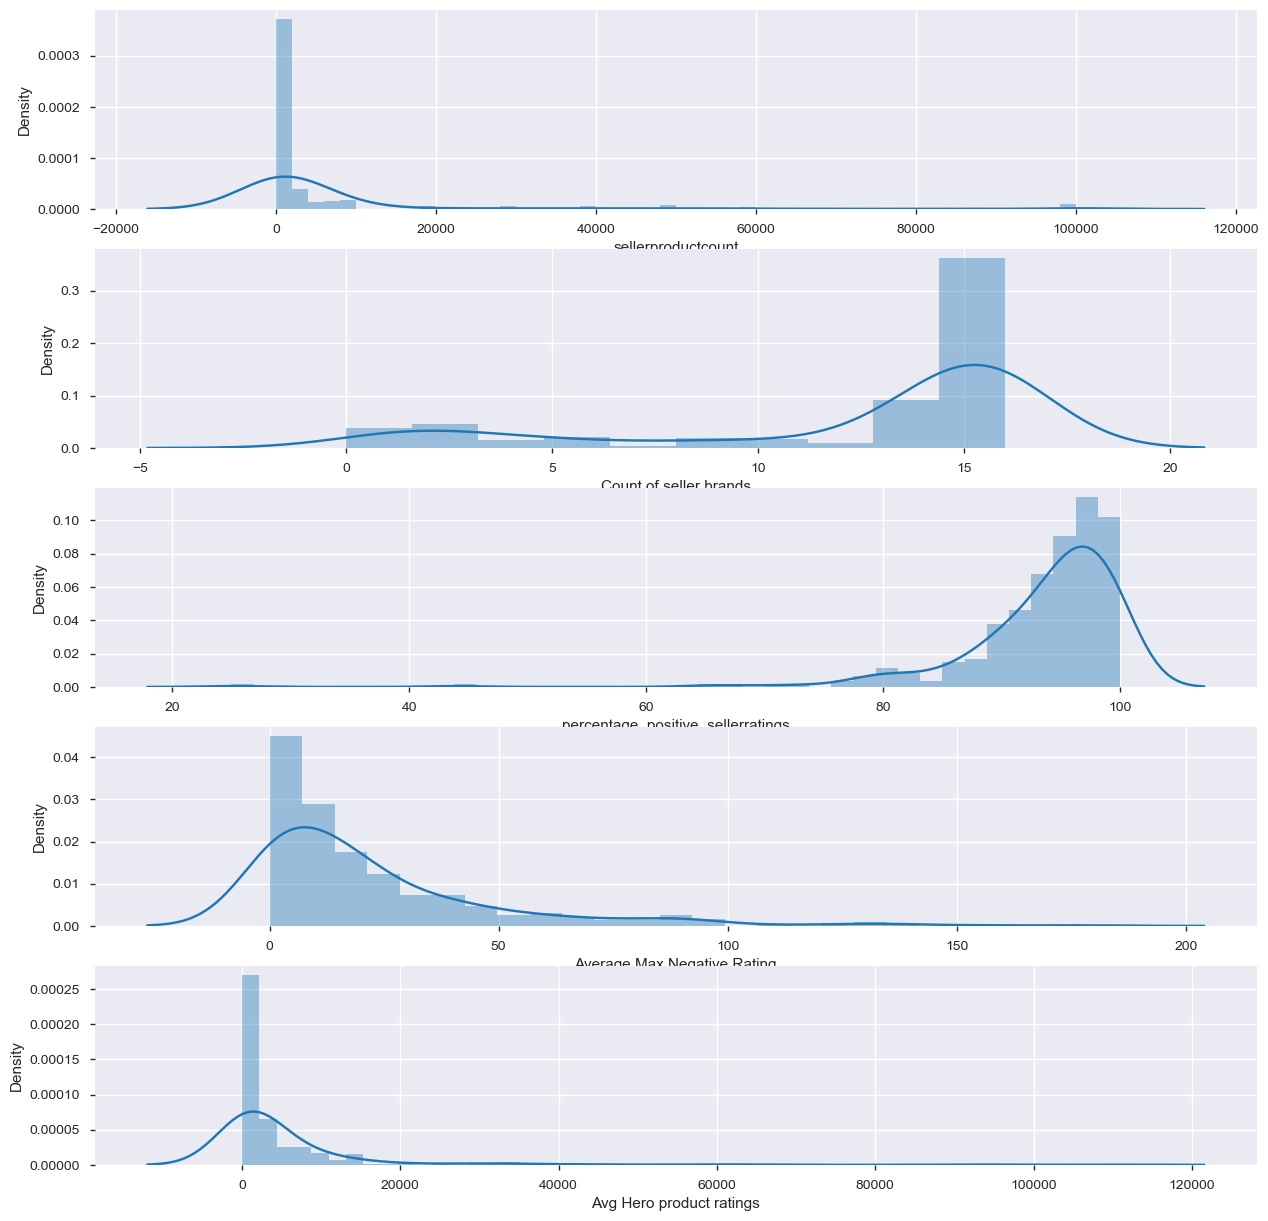

In [1067]:
#Again plotting the density plot
plt.figure(figsize=(15,15))
cols_to_plt=["sellerproductcount","Count of seller brands","percentage_positive_sellerratings","Average Max Negative Rating","Avg Hero product ratings"]
for i in enumerate(cols_to_plt):
    plt.subplot(5,1,i[0]+1)
    
    sns.distplot(df5[i[1]])

In [1068]:
df6.head()

,sellerlink,sellerproductcount,Count of seller brands,percentage_positive_sellerratings,Average Max Negative Rating,Avg Hero product ratings,businessaddress,Email,Phone_number
0,1,10000.0,16.0,88.0,57.866667,7893.5,US,jadgemaello@gmail.com,jadgemaello@gmail.com
14,15,919.0,15.0,97.0,8.000000,1644.0,DE,webmaster@9pm-store.de,webmaster@9pm-store.de
22,23,10000.0,16.0,100.0,0.000000,13060.2,US,Na,Na
23,24,10000.0,15.0,88.0,52.666667,13060.2,DE,bib.beckum@blumenbecker.com,bib.beckum@blumenbecker.com
24,25,3000.0,15.0,97.0,8.666667,4722.0,DE,Na,Na


In [1069]:
#We perform Scaling of data using min max scaler
from sklearn.preprocessing import  MinMaxScaler
scaler=MinMaxScaler(feature_range=(1, 100))


In [1070]:
for col in ["sellerproductcount","Count of seller brands","percentage_positive_sellerratings","Average Max Negative Rating","Avg Hero product ratings"]:
    df6[col]=scaler.fit_transform(df6[[col]])

In [1071]:
df6

,sellerlink,sellerproductcount,Count of seller brands,percentage_positive_sellerratings,Average Max Negative Rating,Avg Hero product ratings,businessaddress,Email,Phone_number
0,1,100.000000,100.000000,15.142857,100.000000,60.834957,US,jadgemaello@gmail.com,jadgemaello@gmail.com
14,15,10.053127,92.928571,78.785714,14.686636,13.461984,DE,webmaster@9pm-store.de,webmaster@9pm-store.de
22,23,100.000000,100.000000,100.000000,1.000000,100.000000,US,Na,Na
23,24,100.000000,92.928571,15.142857,91.103687,100.000000,DE,bib.beckum@blumenbecker.com,bib.beckum@blumenbecker.com
24,25,30.665333,92.928571,78.785714,15.827189,36.794092,DE,Na,Na
...,...,...,...,...,...,...,...,...,...
1779,1780,3.040420,57.571429,57.571429,14.686636,1.970276,DE,info@zooshop-online.com,info@zooshop-online.com
1780,1781,10.855428,85.857143,78.785714,16.967742,5.711145,DE,amazon@zoostore.de,amazon@zoostore.de
1781,1782,4.912456,85.857143,36.357143,32.935484,25.946708,DE,amazon@zooweber.de,amazon@zooweber.de
1808,1809,1.465533,43.428571,100.000000,1.000000,1.557151,DE,Na,Na


In [1072]:
#We want our star sellers to have low Average Max Negative ratings hence we find the inverse of the Avg low neg ratings
df6['Average Max Negative Rating Inverse']=(1/df6['Average Max Negative Rating'])*100
df7=df6.drop(['Average Max Negative Rating'],axis='columns')

To calculate seller score we give certain weight to the features we are considering
* **0.3** to **Average Max Negative Rating and percentage_positive_sellerratings**: Amount/Percentage of negative an dpositive rating gives us idea of the **success rate of order completion by the sellers** which is of atmost importance.
* **0.1** to Count of seller brands	sellerproductcount as more product count and more brands means more type of products indicating the popularity and diversity.
* **0.2** to Avg Hero product ratings shows product placement and popularity of best products


In [1073]:
df7['seller_score']=(0.1*df7['sellerproductcount']+0.1*df7['Count of seller brands']+df7['percentage_positive_sellerratings']*0.3+df7['Average Max Negative Rating Inverse']*0.3+df7['Avg Hero product ratings']*0.2)

In [1074]:
df7['seller_score'].describe()

count    323.000000
mean      40.736236
std       18.582719
min        1.266007
25%       26.815689
50%       38.207663
75%       53.941944
max      100.000000
Name: seller_score, dtype: float64

In [1075]:
#We divide the sellers into 5 Categories ie Diamond,Platinum,Gold,Silve,Bronze 
Quantile=df7.seller_score.quantile(q=[0,0.20,0.40,0.60,0.80,1])
Quantile=Quantile.to_dict()
Quantile

{0.0: 1.266007273862502,
 0.2: 25.27166359446159,
 0.4: 34.227666067228995,
 0.6: 42.94907961003163,
 0.8: 57.95537281865133,
 1.0: 100.0}

Text(0, 0.5, 'Count')

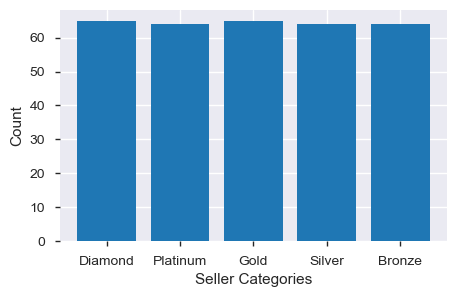

In [1076]:
q=[0,0.20,0.40,0.60,0.80,1]
count=[]

for i in range(0,5):
    count.append(df7[(df7.seller_score>=Quantile[q[i]])&(df7.seller_score<Quantile[q[i+1]])].shape[0])
name=['Diamond','Platinum','Gold','Silver','Bronze']
plt.figure(figsize=(5,3))
plt.bar(name,count)  
plt.xlabel('Seller Categories')
plt.ylabel('Count')

In [1077]:
q=[0,0.20,0.40,0.60,0.80,1]
def assign_Category(x):
    if x<Quantile[0.2]:
        return 'Bronze'
    if x<Quantile[0.4] and x>=Quantile[0.2]:
        return 'Silver'
    if x<Quantile[0.6] and x>=Quantile[0.4]:
        return 'Gold'
    if x<Quantile[0.8] and x>=Quantile[0.6]:
        return 'Platinum'
    if x<Quantile[1]:
        return 'Diamond'
    

In [1078]:
df7["Seller_Category"]=[assign_Category(x) for x in  df7['seller_score']]

In [1079]:
df7

,sellerlink,sellerproductcount,Count of seller brands,percentage_positive_sellerratings,Avg Hero product ratings,businessaddress,Email,Phone_number,Average Max Negative Rating Inverse,seller_score,Seller_Category
0,1,100.000000,100.000000,15.142857,60.834957,US,jadgemaello@gmail.com,jadgemaello@gmail.com,1.000000,37.009848,Gold
14,15,10.053127,92.928571,78.785714,13.461984,DE,webmaster@9pm-store.de,webmaster@9pm-store.de,6.808911,38.668954,Gold
22,23,100.000000,100.000000,100.000000,100.000000,US,Na,Na,100.000000,100.000000,None
23,24,100.000000,92.928571,15.142857,100.000000,DE,bib.beckum@blumenbecker.com,bib.beckum@blumenbecker.com,1.097650,44.165009,Platinum
24,25,30.665333,92.928571,78.785714,36.794092,DE,Na,Na,6.318241,45.249396,Platinum
...,...,...,...,...,...,...,...,...,...,...,...
1779,1780,3.040420,57.571429,57.571429,1.970276,DE,info@zooshop-online.com,info@zooshop-online.com,6.808911,25.769342,Silver
1780,1781,10.855428,85.857143,78.785714,5.711145,DE,amazon@zoostore.de,amazon@zoostore.de,5.893536,36.217261,Gold
1781,1782,4.912456,85.857143,36.357143,25.946708,DE,amazon@zooweber.de,amazon@zooweber.de,3.036239,26.084316,Silver
1808,1809,1.465533,43.428571,100.000000,1.557151,DE,Na,Na,100.000000,64.800841,Diamond


In [1080]:
#Finally we make a Seller directory containing lists of sellers form each categories
Seller_dict={}
for i in ['Diamond','Platinum','Gold','Silver','Bronze']:
    dff=df7[df7.Seller_Category== i]
    Seller_dict[i]=[x for x in dff.sellerlink]
    

In [1081]:
Seller_dict

{'Diamond': [' 54',
  ' 65',
  ' 72',
  ' 101',
  ' 109',
  ' 111',
  ' 115',
  ' 121',
  ' 127',
  ' 128',
  ' 130',
  ' 135',
  ' 146',
  ' 147',
  ' 153',
  ' 157',
  ' 158',
  ' 163',
  ' 164',
  ' 171',
  ' 183',
  ' 209',
  ' 234',
  ' 235',
  ' 244',
  ' 245',
  ' 258',
  ' 265',
  ' 276',
  ' 283',
  ' 302',
  ' 363',
  ' 386',
  ' 476',
  ' 539',
  ' 553',
  ' 589',
  ' 636',
  ' 657',
  ' 785',
  ' 794',
  ' 800',
  ' 820',
  ' 825',
  ' 834',
  ' 835',
  ' 841',
  ' 856',
  ' 862',
  ' 863',
  ' 881',
  ' 905',
  ' 914',
  ' 951',
  ' 986',
  ' 1000',
  ' 1010',
  ' 1022',
  ' 1029',
  ' 1507',
  ' 1526',
  ' 1768',
  ' 1779',
  ' 1809'],
 'Platinum': [' 24',
  ' 25',
  ' 26',
  ' 37',
  ' 38',
  ' 55',
  ' 57',
  ' 102',
  ' 108',
  ' 112',
  ' 156',
  ' 178',
  ' 184',
  ' 187',
  ' 196',
  ' 199',
  ' 202',
  ' 220',
  ' 282',
  ' 284',
  ' 322',
  ' 323',
  ' 387',
  ' 418',
  ' 437',
  ' 492',
  ' 494',
  ' 496',
  ' 538',
  ' 584',
  ' 631',
  ' 705',
  ' 724',
  ' 727